In [1]:
import pypsa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.font_manager
import seaborn as sns
import cartopy.io.shapereader as shpreader
import geopandas as gpd

In [68]:
models = ['ICHEC','CNRM','MPI']
model = 'ICHEC'
cap_output_csv = 'data/cap_share_all_periods_model_{}.csv'.format(model)
cap_input_generators_csv =  'data/cap_factor_input_all_periods_{}.csv'.format(model)
cap_input_per_carrier_csv = 'data/cap_factor_input_per_carrier_all_periods_{}.csv'.format(model)
cap_output = pd.read_csv(cap_output_csv, index_col=0)
cap_input_per_carrier = pd.read_csv(cap_input_per_carrier_csv, index_col=0)
cap_input_per_generator = pd.read_csv(cap_input_csv, index_col=0)
# convert column names to multiindex
col_name_as_tuples = [(col_name.split('\'')[1],col_name.split('\'')[3]) for col_name in cap_input_per_generator.columns]
cap_input_per_generator.columns = pd.MultiIndex.from_tuples(col_name_as_tuples)


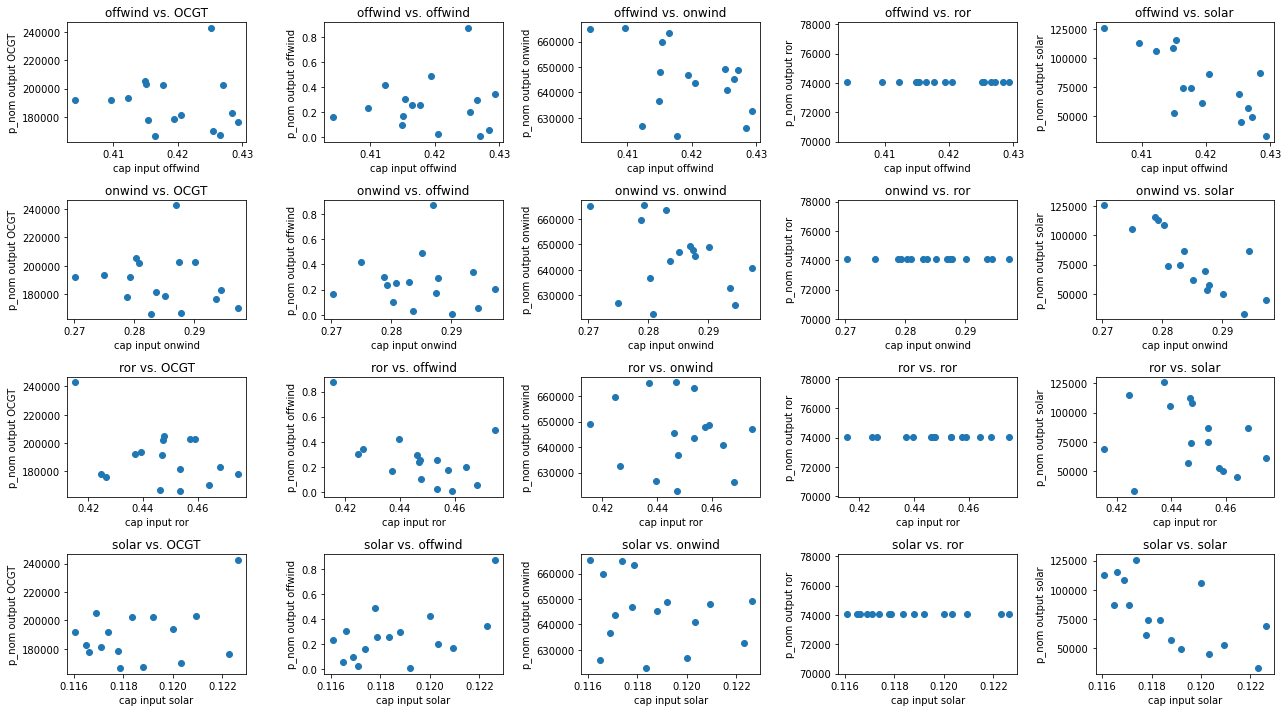

In [85]:
n_rows = len(cap_input_per_carrier.index)
n_cols = len(cap_output.index)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18,10))
for i, idx in enumerate(cap_input_per_carrier.index):
    for j, idx2 in enumerate(cap_output.index):
        ax = axes[i,j]
        ax.scatter(cap_input_per_carrier.loc[idx].values, cap_output.loc[idx2].values)
        ax.set_xlabel("cap input {}".format(idx))
        ax.set_ylabel("p_nom output {}".format(idx2))
        ax.set_title("{} vs. {}".format(idx, idx2))
        
fig.tight_layout()
fig.show()

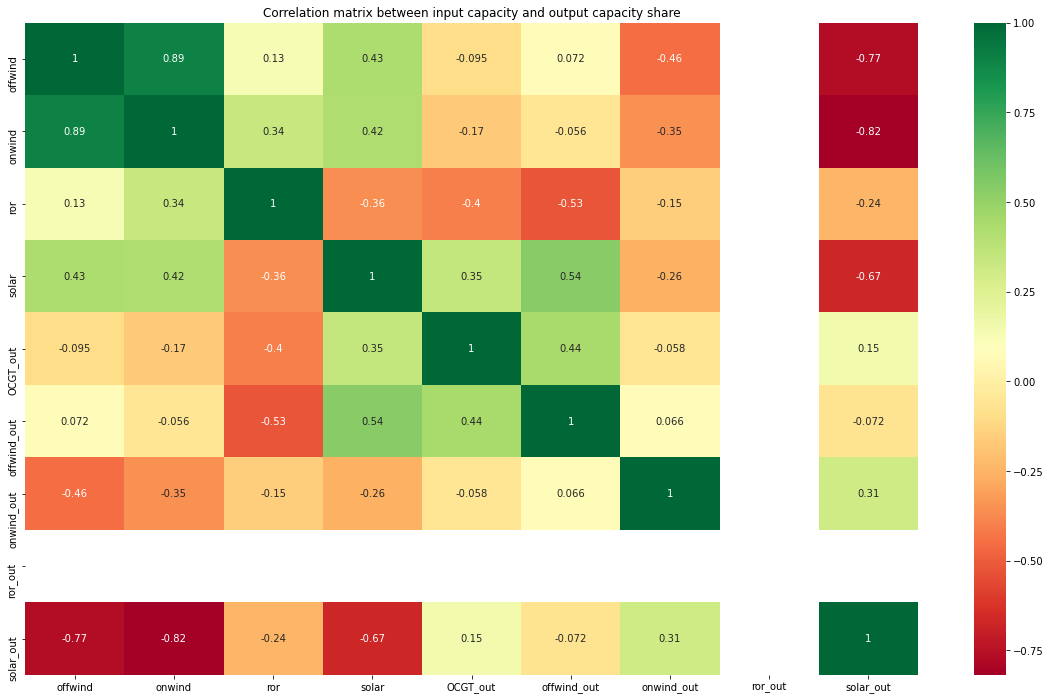

In [104]:
df_both = cap_input_per_carrier.T.copy()
for c in cap_output.T.columns:
    df_both["{}_out".format(c)] = cap_output.T[c]

corr_df = df_both.corr(method='pearson')
plt.figure(figsize=(20, 12))
sns.heatmap(corr_df, annot=True, cmap="RdYlGn")
plt.title("Correlation matrix between input capacity and output capacity share")
plt.show()

In [113]:
cap_input_per_carrier

,1970-1976,1976-1982,1982-1988,1988-1994,1994-2000,2000-2006,2006-2012,2012-2018,2018-2024,2024-2030,2030-2038,2038-2044,2050-2056,2056-2062,2062-2070,2070-2076,2076-2082
offwind,0.429303,0.425398,0.425090,0.415001,NaN,0.427092,0.426500,0.412253,0.419461,0.416508,0.417737,0.428419,0.420551,0.414913,0.404108,0.415384,0.409645
onwind,0.293586,0.297239,0.287030,0.287486,NaN,0.290059,0.287752,0.274994,0.285130,0.282880,0.280873,0.294451,0.283688,0.280354,0.270221,0.278836,0.279264
ror,0.426577,0.464089,0.415289,0.457367,NaN,0.459083,0.446189,0.439443,0.474634,0.453534,0.447257,0.468081,0.453449,0.447696,0.437210,0.424707,0.447070
solar,0.122289,0.120329,0.122619,0.120933,NaN,0.119196,0.118798,0.120002,0.117766,0.117854,0.118340,0.116475,0.117093,0.116900,0.117372,0.116593,0.116065


In [105]:
import pickle as pkl

In [107]:
with open('python/networks_per_period_ICHEC.pkl', 'rb') as f:
    network_all_periods_ICHEC = pkl.load(f)

In [112]:
periods = network_all_periods_ICHEC.keys()


In [118]:
network_all_periods_ICHEC["1970-1976"].generators_t

{'p_min_pu': Empty DataFrame
 Columns: []
 Index: [1970-01-01 00:00:00, 1970-01-01 03:00:00, 1970-01-01 06:00:00, 1970-01-01 09:00:00, 1970-01-01 12:00:00, 1970-01-01 15:00:00, 1970-01-01 18:00:00, 1970-01-01 21:00:00, 1970-01-02 00:00:00, 1970-01-02 03:00:00, 1970-01-02 06:00:00, 1970-01-02 09:00:00, 1970-01-02 12:00:00, 1970-01-02 15:00:00, 1970-01-02 18:00:00, 1970-01-02 21:00:00, 1970-01-03 00:00:00, 1970-01-03 03:00:00, 1970-01-03 06:00:00, 1970-01-03 09:00:00, 1970-01-03 12:00:00, 1970-01-03 15:00:00, 1970-01-03 18:00:00, 1970-01-03 21:00:00, 1970-01-04 00:00:00, 1970-01-04 03:00:00, 1970-01-04 06:00:00, 1970-01-04 09:00:00, 1970-01-04 12:00:00, 1970-01-04 15:00:00, 1970-01-04 18:00:00, 1970-01-04 21:00:00, 1970-01-05 00:00:00, 1970-01-05 03:00:00, 1970-01-05 06:00:00, 1970-01-05 09:00:00, 1970-01-05 12:00:00, 1970-01-05 15:00:00, 1970-01-05 18:00:00, 1970-01-05 21:00:00, 1970-01-06 00:00:00, 1970-01-06 03:00:00, 1970-01-06 06:00:00, 1970-01-06 09:00:00, 1970-01-06 12:00:00, 1970